<div id="container" style="position:relative;">
<div style="position:relative; float:left"><img style="height:140px, width:280px" src ="images/covid_cover.png" />
</div>
</div>

**Combating Covid-19 Misinformation Using Natural Language Processing. How can we create a NLP Classification Model to detect whether an article, post, and tweet is in fact “real” or “fake”?**

<font color='red'>**Please Note:**</font>
<br>

<font color='red'>**This is notebook 3 of 6**</font> - Each article and twitter dataset will have 3 notebooks each containing a 'Loading & Merging', 'Cleaning & EDA', and a 'Vectorizing and Modeling' notebook.

-------------------------------------------------------------------------------------------------------------------

## **Data Dictionary**
<br>

- `type` (object) - Type of media consumption.
- `fact_check_url` (object) - Website reference for validity.
- `archive` (object) - Reference to archival record location.
- `news_url` (object) - Original domain origin of claim.
- `news_url2` (object) - Secondary domain origin of claim.
- `news_url3` (object) - Additonal domain origin of claim.
- `news_url4` (object) - Additonal domain origin of claim.
- `news_url5` (object) - Additonal domain origin of claim.
- `title` (object) - Title of article .
- `newstitle` (object) - Headline of article.
- `content` (object) - Subject matter of post or article.
- `abstract` (object) - Summarization of the subject matter.
- `publish_date` (object) - Date the article or post was published.
- `meta_keywords` (object) - Keywords that are exclusive to the data point.
- `label` (object) - Label refers to whether the claim within an article or post is true or false.


### URL Data
<br>

**Domain Names**
- There are a total of 198 unique domain names within this dataset. 
<br>

<center>TOP 10 DOMAINS</center>



|**Domain Name**   |**Count**       |    
|:------------------|:--------------| 
| www.cdc.gov            |         1031| 
| www.healthline.com            |      586      |   
| www.facebook.com        | 536     |
| www.medicalnewstoday.com            | 463  | 
| www.sciencedaily.com            | 347  |      
| www.who.int            |         158 | 
| www.twitter.com             |      90     |   
| www.nih.gov        | 74    |
| www.youtube.com            | 44  | 
| www.newsroom.cleavelandclinic.org            | 44 |


In [1]:
# Importing everything we need
# The usual packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To make our sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Scalars
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# The classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import itertools

# Scoring
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Word Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
stopwords = set(STOPWORDS)
from PIL import Image

# Cell Width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Tokenize Libraries
# Importing libraries
#import nltk import re
#from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
CoAID_df = pd.read_csv('data/Clean_CoAID_df.csv')

In [3]:
CoAID_df.head()

,type,meta_keywords,label,domain,clean_title,clean_newstitle,clean_content,title_length
0,post,0,fake,www.facebook.com,FACEBOOK POSTS SHARED IN AT LEAST THREE COUNTR...,NaN,NaN,148
1,article,"""""",fake,legis.wisconsin.gov,WISCONSIN IS CLEARLY SEEING A DECLINE IN COVID...,WISCONSIN LEGISLATURE TAKES GOV EVERS TO COURT,SPEAKER ROBIN VOS R ROCHESTER AND SENATE MAJOR...,60
2,post,0,fake,www.facebook.com,FACEBOOK POSTS CLAIM A CHILD WHO IS INFECTED W...,NaN,NaN,114
3,post,0,fake,www.facebook.com,INDIAS MINISTRY OF HOME AFFAIRS BANNING CITIZE...,NaN,NaN,105
4,post,0,fake,www.facebook.com,DEMOCRATIC SENATORS PLUS TWO INDEPENDENTS VOT...,NaN,NaN,151


# **EDA**
<br>

TODOs:
- plotting the categorical variables
- plotting the numeric variables
- Tokenize
- TF-IDF

The main goal is to understand 
<br>

1. the individual column distributions (histograms or box plots), and
2. how the columns may interact with the `label` field, and see if it can help us better classify real news from fake news.

Reminder: the main goal is to detect misinformation

## Categorical Unique Count Distributions

# <font color='red'>**Does title legnth contribute to wether or not an article will be deamed 'real' or 'fake'?**</font>
<br>

**What kind of statistical analyzes can be ran to find out of title legnth is an indicator**
- Statistical testing
- Median of each
- generate more data to have a balanced dataset

### `title` Category

In [4]:
# Set up new title variabel
CoAID_title = CoAID_df

In [5]:
# apply len column 
CoAID_title['title_length'] = CoAID_df['clean_title'].apply(len)
CoAID_title.head()# Check

,type,meta_keywords,label,domain,clean_title,clean_newstitle,clean_content,title_length
0,post,0,fake,www.facebook.com,FACEBOOK POSTS SHARED IN AT LEAST THREE COUNTR...,NaN,NaN,145
1,article,"""""",fake,legis.wisconsin.gov,WISCONSIN IS CLEARLY SEEING A DECLINE IN COVID...,WISCONSIN LEGISLATURE TAKES GOV EVERS TO COURT,SPEAKER ROBIN VOS R ROCHESTER AND SENATE MAJOR...,58
2,post,0,fake,www.facebook.com,FACEBOOK POSTS CLAIM A CHILD WHO IS INFECTED W...,NaN,NaN,114
3,post,0,fake,www.facebook.com,INDIAS MINISTRY OF HOME AFFAIRS BANNING CITIZE...,NaN,NaN,104
4,post,0,fake,www.facebook.com,DEMOCRATIC SENATORS PLUS TWO INDEPENDENTS VOT...,NaN,NaN,147


Text(0.5, 1.0, 'Length of Title')

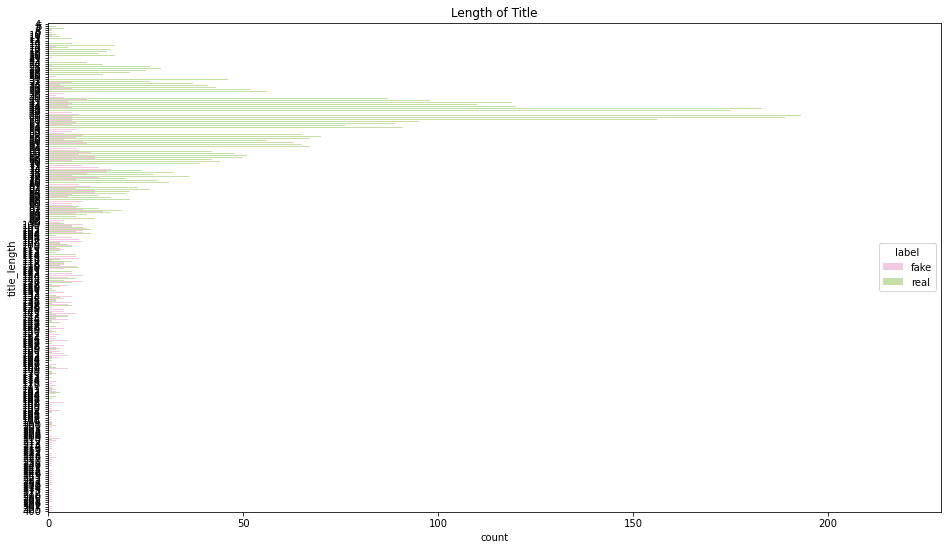

In [6]:
# set up 
plt.figure(figsize=(16,9))
# Plot variables and color palette          
sns.countplot(y='title_length', hue='label', data=CoAID_df, palette='PiYG')
# Dont forget the title        
plt.title("Length of Title")

In [7]:
# Check any interesting statistics
CoAID_title['title_length'].describe()

count    5457.000000
mean       63.289720
std        34.309445
min         4.000000
25%        44.000000
50%        53.000000
75%        73.000000
max       400.000000
Name: title_length, dtype: float64

In [8]:
# Retrieve the title with the longest word length
CoAID_title[CoAID_title['title_length'] == 44]['clean_title'].iloc[0]

'A PHOTO SHOWING UGANDAS FIRST CASE OF COVID '

We will use a histogram to better visualize of the title lengths within each `label` classification. It will be interesting to see if title length has anything to do with an article being 'real' or 'fake'. 

array([<AxesSubplot:title={'center':'fake'}>,
       <AxesSubplot:title={'center':'real'}>], dtype=object)

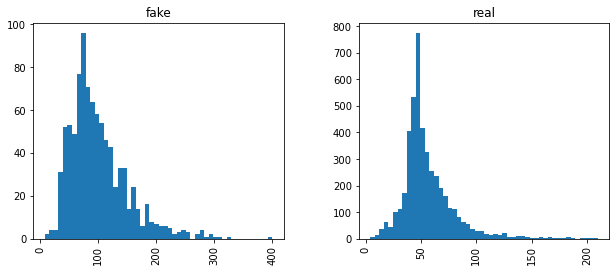

In [9]:
# plot the title length distribution
CoAID_title.hist(column='title_length',by ='label',bins=50,figsize = (10,4))

### `type` Category

In [10]:
# Set up type variable
CoAID_type = CoAID_df

# <font color='red'>**REMOVE '0' Category**</font>

<br>
The '0' category should go away after you clean up the missing data and start using the properly cleaned dataset

Text(0.5, 1.0, 'Count of Type')

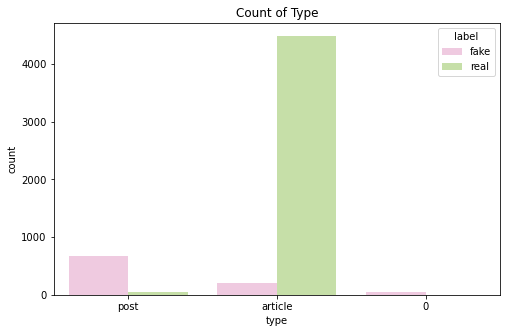

In [11]:
# set up plot
plt.figure(figsize=(8,5))
# plot type and label 'real' or 'fake'           
sns.countplot(x='type', hue='label', data=CoAID_df, palette='PiYG')
# Title   
plt.title("Count of Type")

### `domain` Category

In [12]:
# Set up domain variable
CoAID_domain = CoAID_df

<AxesSubplot:xlabel='count', ylabel='domain'>

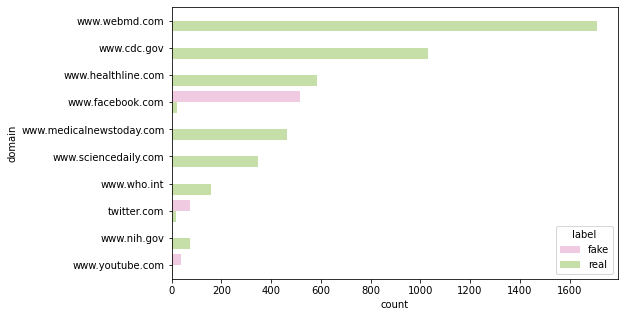

In [13]:
# domain variable
domains = CoAID_domain
#plot size
plt.figure(figsize=(8,5))
# Seaborn plot domain and label tag
sns.countplot(y="domain",hue='label', data=domains, palette='PiYG',
              order=domains.domain.value_counts().iloc[:10].index)# retrieve top 10 counts

### `label` Category

Text(0.5, 1.0, 'Count of Domains')

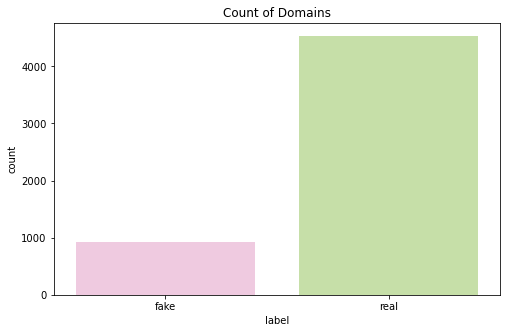

In [14]:
# set up figure size
plt.figure(figsize=(8,5))
# plot label counts for dataframe           
sns.countplot(x='label',data=CoAID_df, palette='PiYG')
# Title the plot           
plt.title("Count of Domains")

## Tokenizing

**Columns to Tokenize:** 
- `news_url`
- `title`
- `newstitle`
- `content`

In [15]:
def concat_all_sentences(sents):
    
    """
    Using this function will make sentences clean

    Arguments
    --------
    all_tokens:              is '' space

    loop through text:       

    parameters:             tx will lowercase all chars
                        replace : new lines, hashtags, punctuation, 
                        with : whitespace
                        join : 

    Usage
    -------
    concat_all_sentences(variable)


    """

    all_tokens = ''
    for text in sents:
        tx = str(text).lower().strip()
        tx = tx.replace('\n', ' ')
        tx = tx.replace('&amp', ' ')
        tx = tx.replace('#', '')
        tx = tx.replace('-', '')
        tx = tx.replace(';', '')
        tx = tx.replace('/', '')
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

### News "URL" Tokens

Combine all data frames for use later

In [16]:
# combine all news_urls
newsurl_combined = CoAID_df['domain']
newsurl_fake = CoAID_df[CoAID_df['label']=='fake']['domain']# combine fake urls
newsurl_real = CoAID_df[CoAID_df['label']=='real']['domain']# combine real urls

Clean up the sentences using the concat all sentences function we defined earlier.

In [17]:
# Concat all sentenes in urls
newsurl_tokens = concat_all_sentences(newsurl_combined)
newsurl_fake_tokens = concat_all_sentences(newsurl_fake)# concat all sentences in fake urls  
newsurl_real_tokens = concat_all_sentences(newsurl_real) # concat all sentences in real urls

### Article "Title" Tokens

In [18]:
# combine all titles
title_combined = CoAID_df['clean_title']
title_fake = CoAID_df[CoAID_df['label']=='fake']['clean_title']# combine all fake titles
title_real = CoAID_df[CoAID_df['label']=='real']['clean_title']# combine all real titles

What does a fake title look like?

In [19]:
# Analyse fake title
title_real.head(5).values

array(['CORONAVIRUS OUTBREAK LIVE UPDATES',
       'SCREEN TIME DOESNT HURT KIDS SOCIAL SKILLS STUDY FINDS',
       'HERES EXACTLY WHERE WE ARE WITH VACCINES AND TREATMENTS FOR COVID ',
       'HERES WHAT HAPPENS TO THE BODY AFTER CONTRACTING THE NEW CORONAVIRUS',
       'WHY YOU SHOULD BE SKEPTICAL OF EARLY RESULTS OF COVID DRUG'],
      dtype=object)

In [20]:
# Concat all sentenes in titles
title_tokens = concat_all_sentences(title_combined)
title_fake_tokens = concat_all_sentences(title_fake)# concat all sentences in fake titles 
title_real_tokens = concat_all_sentences(title_real)# concat all sentences in fake titles 

### Article "News Title" Tokens

Repeat for news titles

In [21]:
# combine all titles
newstitle_combined = CoAID_df['clean_newstitle']
newstitle_fake = CoAID_df[CoAID_df['label']=='fake']['clean_newstitle']# combine all fake titles
newstitle_real = CoAID_df[CoAID_df['label']=='real']['clean_newstitle']# combine all real titles

In [22]:
# Concat all sentenes in titles
newstitle_tokens = concat_all_sentences(newstitle_combined)
newstitle_fake_tokens = concat_all_sentences(newstitle_fake) # concat all sentences in fake titles  
newstitle_real_tokens = concat_all_sentences(newstitle_real) # concat all sentences in real titles

### Article "Content" Tokens

Repeat for Content

In [23]:
# combine all content
content_combined = CoAID_df['clean_content']
content_fake = CoAID_df[CoAID_df['label']=='fake']['clean_content']# combine all fake content
content_real = CoAID_df[CoAID_df['label']=='real']['clean_content']# combine all real content

In [24]:
# Concat all sentenes in content
content_tokens = concat_all_sentences(content_combined)
content_fake_tokens = concat_all_sentences(content_fake)# concat all sentences in fake content    
content_real_tokens = concat_all_sentences(content_real)# concat all sentences in real content 

#### Stop Words Custom Library

Set up a custom stopwords library to use along side english stopwords to remove words that appear in both fake and real dataframes so we can have a better understanding of what unique words appear most frequently in each dataframe

In [25]:
# Custom StopWords Library
stopwords = stopwords.union({
    'https', 'co', 'covid 19', 'coronavirus', 'covid', 'covid19', 'website',
    'people', '0', 'coronavirus.', '|', '|', 'access"', '"access', 'denied',
    '""', '&', '"covid19', '"log', 'coronavirus"', '"the', '"remarks',
    'forbidden"', '"403', '..."', 'covid19:', 'www.webmd.com', 'cloudflare',
    'used', 'restrict', '*coronavirus', '(covid19)', 'covid 19', '2019',
    'covid 19:', '(covid19)"', 'covid19"', '"covid19:', '"coronavirus', '_','nan'
})

## Token Value Counts

### Domains / News Url

- Distributions of url's within the data set
- Url 'real' and 'fake' counts
- Compare url's

In [26]:
# apply stop works to dataframes all, real, and fake
domain_words = [w for w in newsurl_tokens.split() if w not in stopwords]
domain_fake_words = [w for w in newsurl_fake_tokens.split() if w not in stopwords]
domain_real_words = [w for w in newsurl_real_tokens.split() if w not in stopwords]

In [27]:
# obtain the top most frequently used token in the all, fake, and real dataframes
top_domain_words = Counter(domain_words).most_common(20)
top_domain_fake_words = Counter(domain_fake_words).most_common(20)
top_domain_real_words = Counter(domain_real_words).most_common(20)

In [28]:
# create a new dataframe to store top words
domain_words_list = pd.DataFrame({
    'Domain Words': top_domain_words,
    'Fake Domain Words': top_domain_fake_words,
    'Real Domaine Words': top_domain_real_words
})

In [29]:
# show dataframe with top words
domain_words_list

,Domain Words,Fake Domain Words,Real Domaine Words
0,"(www.cdc.gov, 1031)","(www.facebook.com, 516)","(www.cdc.gov, 1031)"
1,"(www.healthline.com, 586)","(twitter.com, 74)","(www.healthline.com, 586)"
2,"(www.facebook.com, 536)","(www.youtube.com, 37)","(www.medicalnewstoday.com, 463)"
3,"(www.medicalnewstoday.com, 463)","(youtu.be, 21)","(www.sciencedaily.com, 347)"
4,"(www.sciencedaily.com, 347)","(www.instagram.com, 21)","(www.who.int, 158)"
5,"(www.who.int, 158)","(www.whitehouse.gov, 7)","(www.nih.gov, 74)"
6,"(twitter.com, 90)","(www.rev.com, 6)","(newsroom.clevelandclinic.org, 40)"
7,"(www.nih.gov, 74)","(www.naturalnews.com, 4)","(newsnetwork.mayoclinic.org, 35)"
8,"(www.youtube.com, 44)","(n5ti.com, 4)","(www.facebook.com, 20)"
9,"(newsroom.clevelandclinic.org, 40)","(www.thegatewaypundit.com, 4)","(twitter.com, 16)"


Let's see how many unique `urls` (domain names/websites) we have in this dataset. This will give us a better understanding of how many features may come into play later down the line when we start feature engineering and optimizing our models.

In [30]:
# variable to hold the count
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(domain_words)):
    
    if domain_words[i] not in visited: 
        
        visited.append(domain_words[i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values :",
      visited)

No.of.unique values : 198
unique values : ['www.facebook.com', 'legis.wisconsin.gov', 'secondnexus.com', 'www.gilmorehealth.com', 'twitter.com', 'www.tiktok.com', 'youtu.be', 'www.theepochtimes.com', 'www.wivb.com', 'www.teaparty.org', 'www.thedailybeast.com', 'www.rev.com', 'video.foxnews.com', 'www.youtube.com', 'therepublicpost.wordpress.com', 'gellerreport.com', 'aviationdaily.news', 'pulpitandpen.org', 'www.americanthinker.com', 'www.wearethemighty.com', 'medium.com', 'www.weblyf.com', 'bustatroll.org', 'www.naturalnews.com', 'www.newyorkonenews.com', 'n5ti.com', 'mavenroundtable.io', 'drcarolehhaynes.com', 'wikitrusted.com', 'www.studentproblems.com', 'www.foxnews.com', 'mynacl.blogspot.com', 'www.whitehouse.gov', 'introtimes.com', 'smartairfilters.com', 'gossipblend.com', 'channel45news.com', 'www.nsemwoha.com', 'www.cbsnews.com', 'worldnewsdailyreport.com', 'www.globalresearch.ca', 'buffalochronicle.com', 'transcripts.cnn.com', 'ucrtv.com', 'hannity.com', 'beingtexan.com', 'opr

we have 198 unique `url's` within our dataset. 

In [31]:
domain_real_df = pd.DataFrame(Counter(domain_real_words).most_common(20))
domain_fake_df = pd.DataFrame(Counter(domain_fake_words).most_common(20))
domain_fake_df.columns = ['Word', 'Frequency']
domain_real_df.columns = ['Word', 'Frequency']

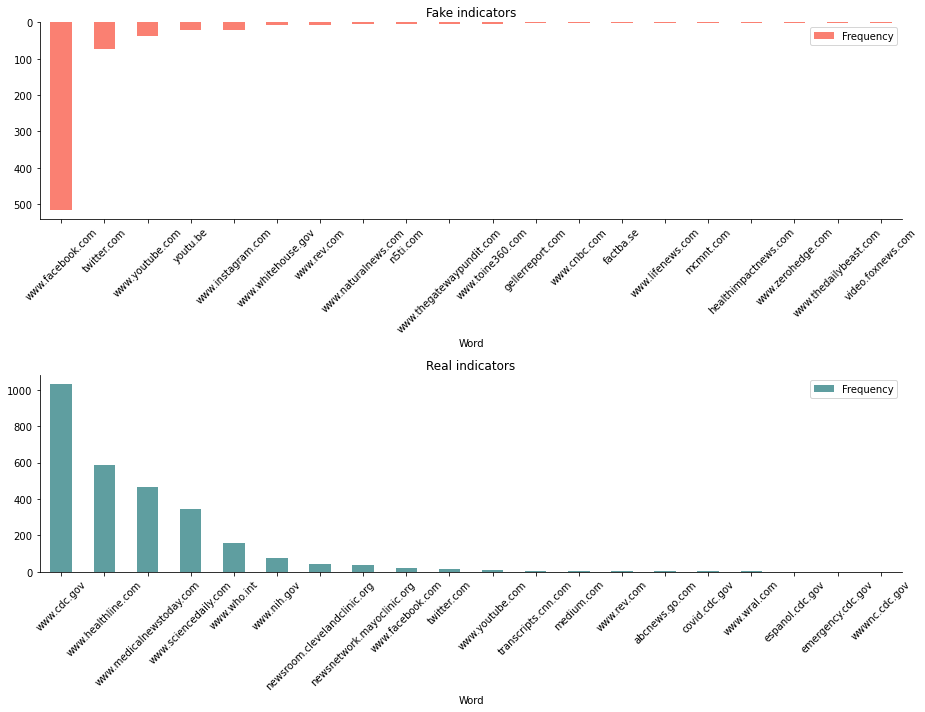

In [32]:
# set up the subplots
fig, axs = plt.subplots(2, 1, figsize=(13, 10))

# most frequent -> tokens indicating fake 
domain_fake_df.head(20).set_index("Word").plot(kind="bar",
                                              rot=45,
                                              ax=axs[0],
                                              color="salmon").invert_yaxis()
axs[0].set_title("Fake indicators")

# most frequent -> tokens indicating real
domain_real_df.head(20).set_index("Word").plot(kind="bar",
                                              rot=45,
                                              ax=axs[1],
                                              color="cadetblue")
# set the title
axs[1].set_title("Real indicators")
# layout for plot
sns.despine()
plt.tight_layout()
plt.show()

### Title 
Repeat process the same as above to determine word counts

In [33]:
# apply stop works to dataframes all, real, and fake
title_words = [w for w in title_tokens.split() if w not in stopwords]
title_fake_words = [w for w in title_fake_tokens.split() if w not in stopwords]
title_real_words = [w for w in title_real_tokens.split() if w not in stopwords]

In [34]:
# obtain the top most frequently used token in the all, fak, and real dataframes
top_title_words = Counter(title_words).most_common(20)
top_title_fake_words = Counter(title_fake_words).most_common(20)
top_title_real_words = Counter(title_real_words).most_common(20)

In [35]:
# create a new dataframe to store top words
title_words_list = pd.DataFrame({
    'Title Words': top_title_words,
    'Fake Title Words': top_title_fake_words,
    'Real Title Words': top_title_real_words
})

In [36]:
# show dataframe
title_words_list

,Title Words,Fake Title Words,Real Title Words
0,"(pandemic, 284)","(u, 68)","(may, 257)"
1,"(may, 276)","(pandemic, 67)","(pandemic, 217)"
2,"(new, 238)","(president, 66)","(new, 185)"
3,"(vaccine, 235)","(says, 64)","(vaccine, 180)"
4,"(health, 199)","(s, 64)","(health, 171)"
5,"(u, 190)","(trump, 62)","(risk, 138)"
6,"(s, 184)","(masks, 60)","(patients, 138)"
7,"(patients, 153)","(vaccine, 55)","(study, 136)"
8,"(masks, 153)","(new, 53)","(sars, 135)"
9,"(cases, 151)","(virus, 52)","(guidance, 129)"


In [37]:
title_real_df = pd.DataFrame(Counter(title_real_words).most_common(20))
title_fake_df = pd.DataFrame(Counter(title_fake_words).most_common(20))
title_fake_df.columns = ['Word', 'Frequency']
title_real_df.columns = ['Word', 'Frequency']

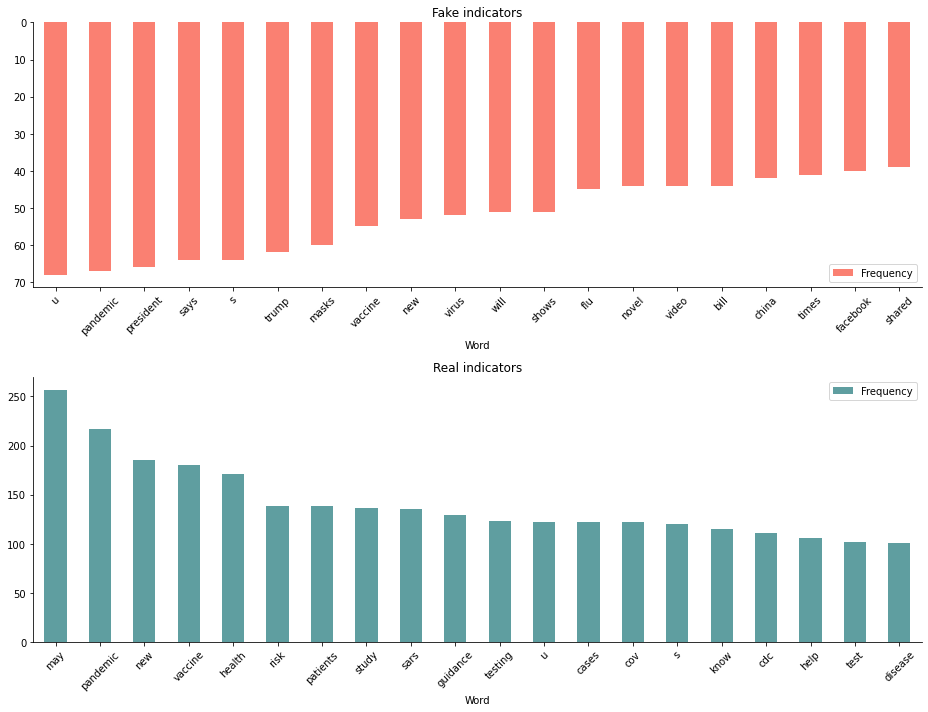

In [38]:
# set up plots
fig, axs = plt.subplots(2, 1, figsize=(13, 10))

# most frequent -> tokens indicating fake 
title_fake_df.head(20).set_index("Word").plot(kind="bar",
                                              rot=45,
                                              ax=axs[0],
                                              color="salmon").invert_yaxis()
axs[0].set_title("Fake indicators")

# most frequent -> tokens indicating real
title_real_df.head(20).set_index("Word").plot(kind="bar",
                                              rot=45,
                                              ax=axs[1],
                                              color="cadetblue")
#title plots
axs[1].set_title("Real indicators")
# plot layout
sns.despine()
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='count', ylabel='domain'>

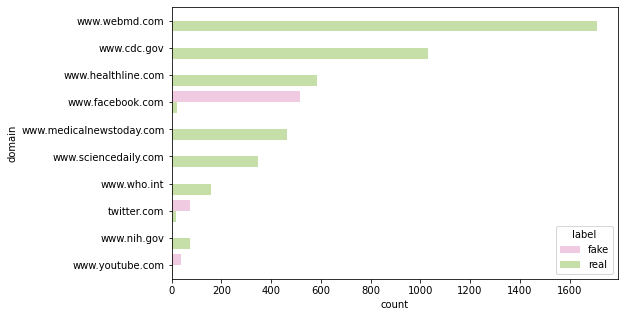

In [39]:
# plot top websites for real and fake
domains = CoAID_df
plt.figure(figsize=(8,5))
sns.countplot(y="domain",hue='label', data=domains, palette='PiYG',
              order=domains.domain.value_counts().iloc[:10].index)

Text(0.5, 1.0, 'Count of Title Tokens')

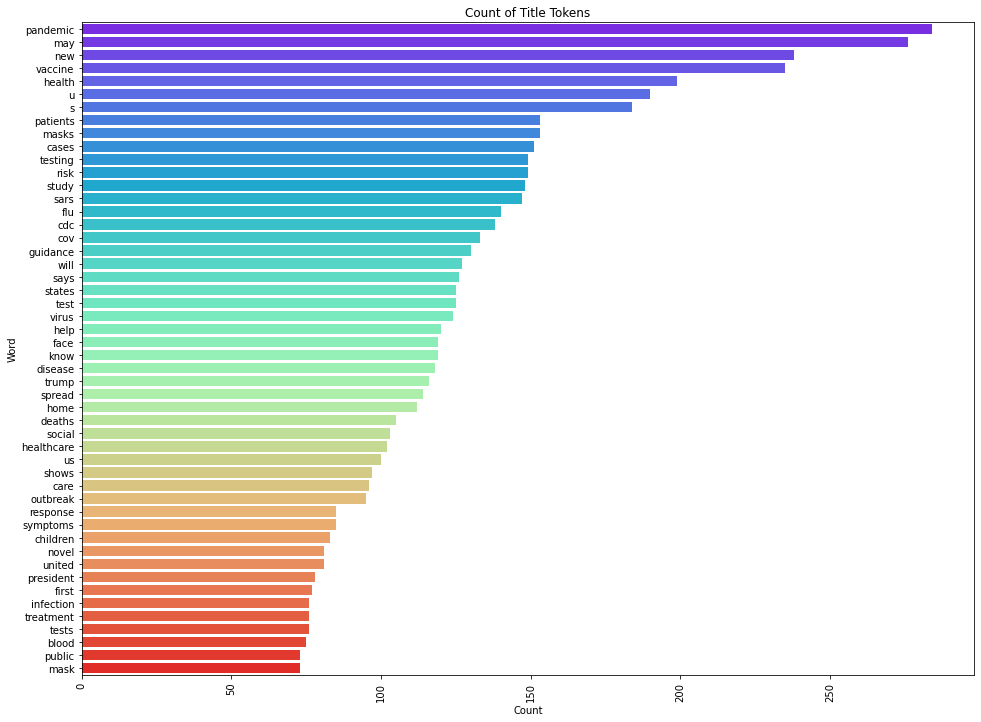

In [40]:
# DF for words
top_title_words_list = pd.DataFrame(Counter(title_words).most_common(50))
top_title_words_list.columns = ['Word', 'Count']

#
#sns.set(style="ticks", context="talk")

# Top Title Words
plt.figure(figsize=(16, 12))
sns.barplot(x="Count", y='Word', data=top_title_words_list, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Count of Title Tokens")

### News Title
Repeat the above process for news titles

In [41]:
newstitle_words = [w for w in newstitle_tokens.split() if w not in stopwords]
newstitle_fake_words = [w for w in newstitle_fake_tokens.split() if w not in stopwords]
newstitle_real_words = [w for w in newstitle_real_tokens.split() if w not in stopwords]

In [42]:
top_newstitle_words = Counter(newstitle_words).most_common(20)
top_newstitle_words = Counter(newstitle_fake_words).most_common(20)
top_newstitle_words = Counter(newstitle_real_words).most_common(20)

In [43]:
newstitle_words_list = pd.DataFrame({
    'Title Words': top_newstitle_words,
    'Fake Title Words': top_newstitle_words,
    'Real Title Words': top_newstitle_words
})

In [44]:
newstitle_words_list

,Title Words,Fake Title Words,Real Title Words
0,"(access, 2180)","(access, 2180)","(access, 2180)"
1,"(webmd, 1084)","(webmd, 1084)","(webmd, 1084)"
2,"(disease, 596)","(disease, 596)","(disease, 596)"
3,"(schools, 202)","(schools, 202)","(schools, 202)"
4,"(events, 196)","(events, 196)","(events, 196)"
5,"(communities, 196)","(communities, 196)","(communities, 196)"
6,"(workplaces, 193)","(workplaces, 193)","(workplaces, 193)"
7,"(may, 126)","(may, 126)","(may, 126)"
8,"(health, 113)","(health, 113)","(health, 113)"
9,"(pandemic, 111)","(pandemic, 111)","(pandemic, 111)"


In [45]:
newstitle_real_df = pd.DataFrame(Counter(newstitle_real_words).most_common(20))
newstitle_fake_df = pd.DataFrame(Counter(newstitle_fake_words).most_common(20))
newstitle_fake_df.columns = ['Word', 'Frequency']
newstitle_real_df.columns = ['Word', 'Frequency']

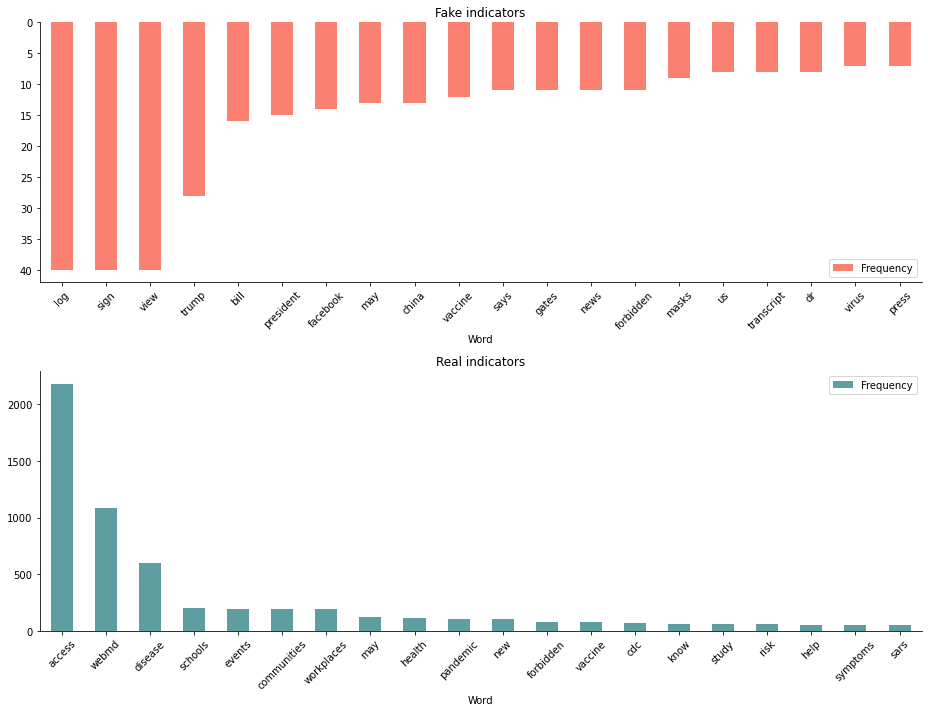

In [46]:
# set up plots
fig, axs = plt.subplots(2, 1, figsize=(13, 10))

# most frequent -> tokens indicating fake 
newstitle_fake_df.head(20).set_index("Word").plot(kind="bar",
                                                  rot=45,
                                                  ax=axs[0],
                                                  color="salmon").invert_yaxis()
axs[0].set_title("Fake indicators")

# most frequent -> tokens indicating real
newstitle_real_df.head(20).set_index("Word").plot(kind="bar",
                                                  rot=45,
                                                  ax=axs[1],
                                                  color="cadetblue")
# Title the plot
axs[1].set_title("Real indicators")
# plot layoout
sns.despine()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Count of News Title Tokens')

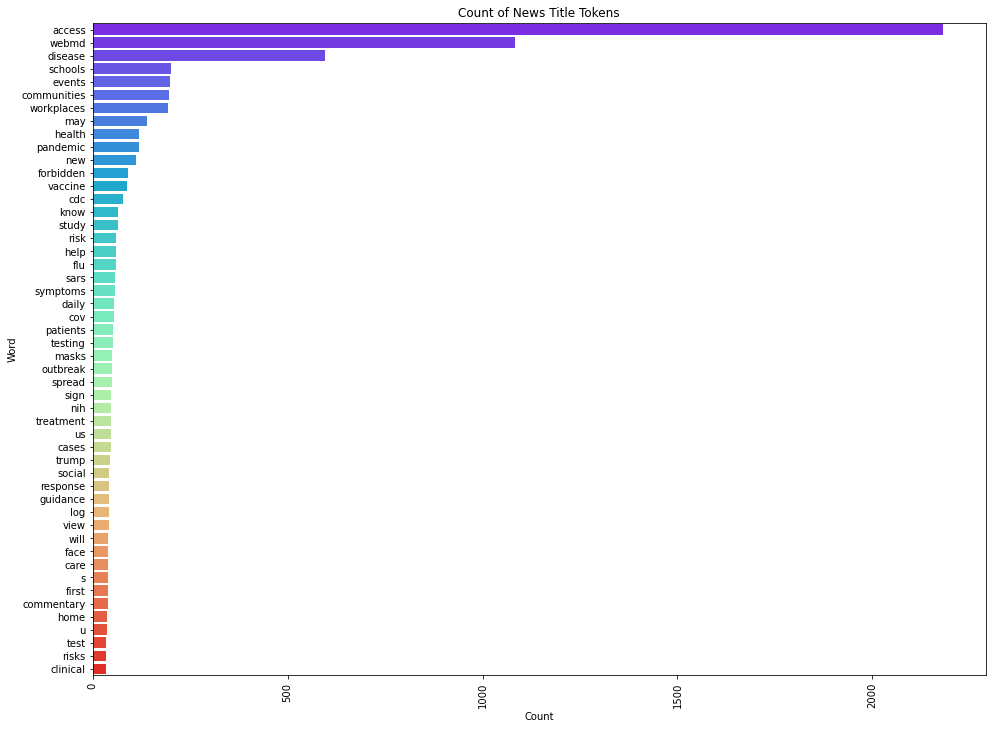

In [47]:
# DF for words
top_news_title_words_list = pd.DataFrame(
    Counter(newstitle_words).most_common(50))
top_news_title_words_list.columns = ['Word', 'Count']

# Top Title Words
plt.figure(figsize=(16, 12))
sns.barplot(x="Count", y='Word', data=top_news_title_words_list, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Count of News Title Tokens")

### Content
Repea the process for the content

In [48]:
content_words = [w for w in content_tokens.split() if w not in stopwords]
content_fake_words = [w for w in content_fake_tokens.split() if w not in stopwords]
content_real_words = [w for w in content_real_tokens.split() if w not in stopwords]

In [49]:
top_content_words = Counter(content_words).most_common(20)
top_content_fake_words = Counter(content_fake_words).most_common(20)
top_content_real_words = Counter(content_real_words).most_common(20)

In [50]:
content_words_list = pd.DataFrame({
    'Title Words': top_content_words,
    'Fake Title Words': top_content_fake_words,
    'Real Title Words': top_content_real_words
})

In [51]:
content_words_list

,Title Words,Fake Title Words,Real Title Words
0,"(protect, 1268)","(facebook, 156)","(protect, 1259)"
1,"(health, 1266)","(see, 143)","(health, 1215)"
2,"(using, 1208)","(health, 51)","(online, 1204)"
3,"(online, 1206)","(new, 47)","(using, 1204)"
4,"(may, 1171)","(president, 45)","(may, 1142)"
5,"(service, 1143)","(virus, 43)","(service, 1141)"
6,"(data, 1140)","(china, 42)","(data, 1132)"
7,"(security, 1111)","(want, 40)","(security, 1100)"
8,"(attacks, 1096)","(world, 38)","(attacks, 1095)"
9,"(new, 1013)","(trump, 38)","(new, 966)"


In [52]:
content_real_df = pd.DataFrame(Counter(content_real_words).most_common(20))
content_fake_df = pd.DataFrame(Counter(content_fake_words).most_common(20))
content_fake_df.columns = ['Word', 'Frequency']
content_real_df.columns = ['Word', 'Frequency']

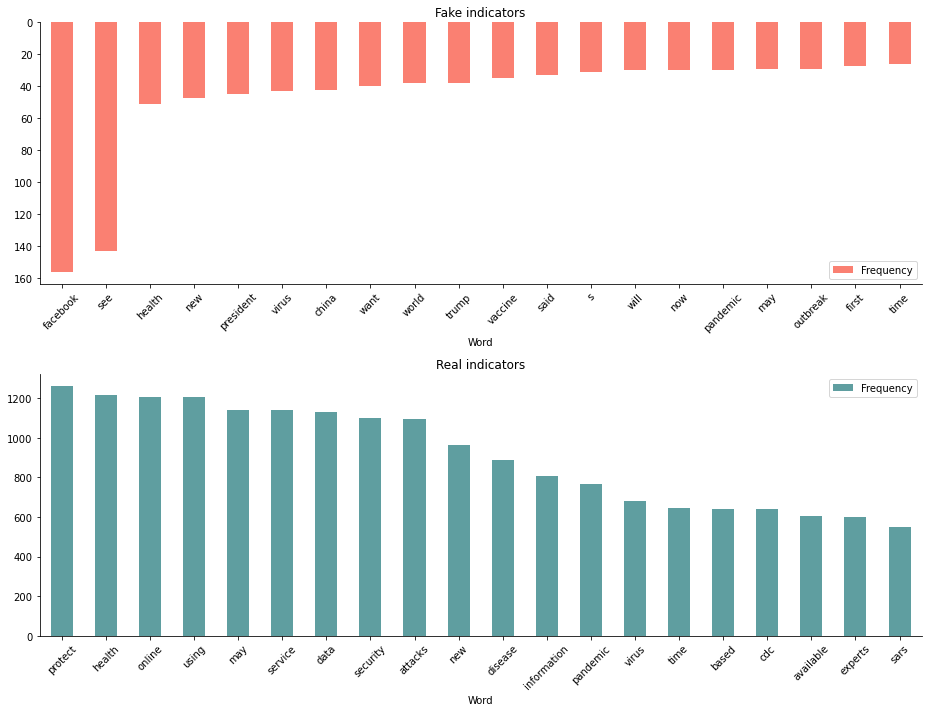

In [53]:
# set up plots
fig, axs = plt.subplots(2, 1, figsize=(13, 10))

# most frequent -> tokens indicating fake 
content_fake_df.head(20).set_index("Word").plot(kind="bar",
                                                rot=45,
                                                ax=axs[0],
                                                color="salmon").invert_yaxis()
axs[0].set_title("Fake indicators")

# most frequent -> tokens indicating real 
content_real_df.head(20).set_index("Word").plot(kind="bar",
                                                rot=45,
                                                ax=axs[1],
                                                color="cadetblue")
# title
axs[1].set_title("Real indicators")
# plot layouts
sns.despine()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Count of Content Tokens')

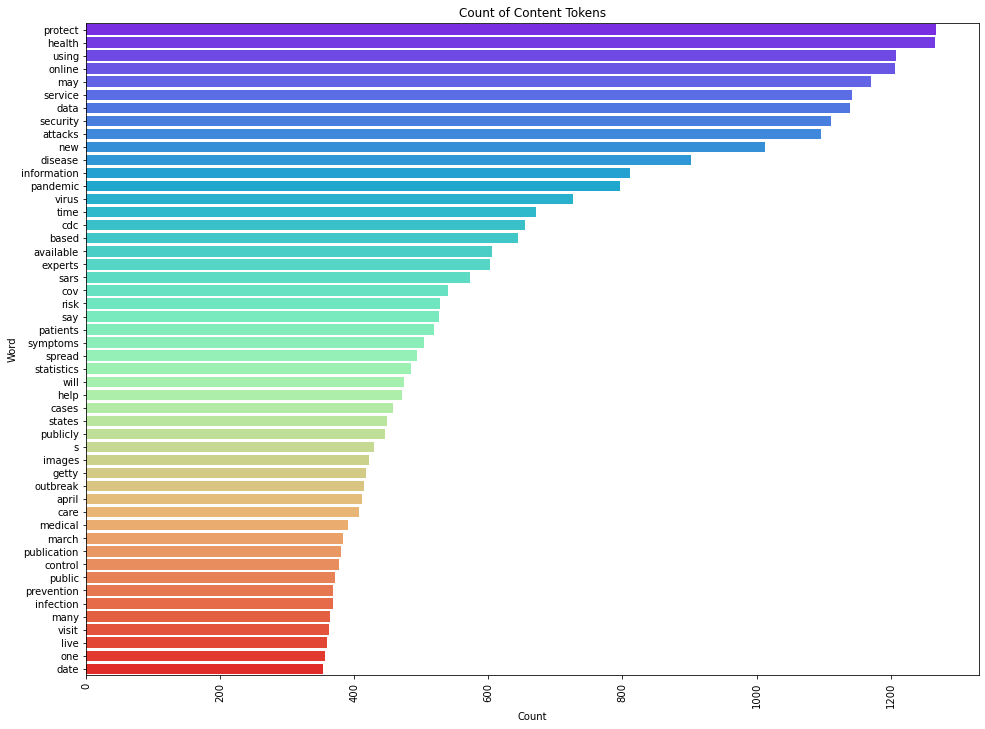

In [54]:
# DF for words
top_content_words_list = pd.DataFrame(Counter(content_words).most_common(50))
top_content_words_list.columns = ['Word', 'Count']

# Top Title Words
plt.figure(figsize=(16, 12))
sns.barplot(x="Count", y='Word', data=top_content_words_list, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Count of Content Tokens")

Review original topics for future feature engineering

# Cleaning & EDA Conclusion

## What’s the Conclusion from the EDA on Text Data?
<br>

Let’s take a look at the inferences drawn from the above analysis:

- WOrds like says and said appear most commonly in fake news
- Fake news titles are shorter in length
- Fake news uses much simpler terms and sentences
- Uni Grams will be the best indicator/features to use for modeling


# End of Part 3 of 6: Please Refer to Part 4 of 6